### Step 1: 
Import relevant packages

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

### Step 2: 
Load the Fashion-MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_pre, y_train_pre), (x_test, y_test) = fashion_mnist.load_data()

#### check the type of training data and the number of images and lables

In [3]:
print(type(x_train_pre))
print(type(y_train_pre))
print(x_train_pre.shape)
print(y_train_pre.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)


#### check the image

In [4]:
y_train_pre[0]

9

#### the image below is the first image in that data, whose the lable is 9

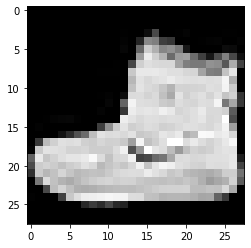

In [5]:
plt.imshow(x_train_pre[0], 'gray')

### show some images of each lable

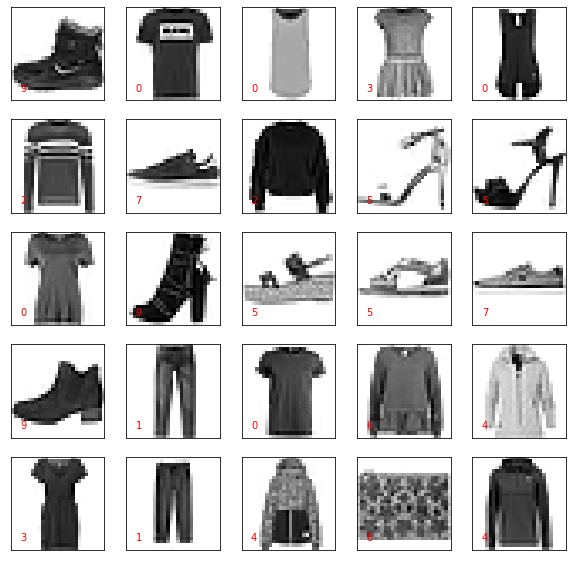

In [6]:
ig, axes = plt.subplots(5, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]})
for i, j in enumerate(axes.flat):
    j.imshow(x_train_pre[i], cmap='binary', interpolation='nearest')
    j.text(0.1, 0.1 , str(y_train_pre[i]), transform=j.transAxes, color='red')

### Step 3: 
Take a subset of the data set

In [7]:
x_data = np.concatenate((x_train_pre, x_test), axis=0)
y_data = np.concatenate((y_train_pre, y_test), axis=0)
print(x_data.shape)
print(y_data.shape)

(70000, 28, 28)
(70000,)


#### get sample sets x and lable sets y

In [8]:
# with testing, using 'shuffle' parameter can improve the performance of each classifier effectivly, 
# because it makes the random data more likely to the whole data
x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(x_data, y_data, test_size=0.25,
                                                                        random_state=0, shuffle=True)
print(x_train_temp.shape)
print(x_test_temp.shape)

(52500, 28, 28)
(17500, 28, 28)


#### select 2000 for training and 500 for testing

In [9]:
x_train = x_train_temp[:2000]
y_train = y_train_temp[:2000]
x_test = x_test_temp[:500]
y_test = y_test_temp[:500]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 28, 28)
(2000,)
(500, 28, 28)
(500,)


### Step 4: 
Perform necessary reshaping of the data for the classifiers

In [10]:
x_train = x_train.reshape(2000, -1)
x_test = x_test.reshape(500, -1)

print(x_train.shape)
print(x_test.shape)

(2000, 784)
(500, 784)


### Next Steps

### KNN Classifier

In [11]:
#step5, step6 and step7 for KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
predict_y_knn = knn_clf.predict(x_test)

#And then get Accuracy, Precision, Recall, F1 and Confusion matrix by KNN Classifier

#### Accuracy

In [12]:
metrics.accuracy_score(y_test, predict_y_knn)

0.754

#### Precision

In [13]:
metrics.precision_score(y_test, predict_y_knn, average='macro')

0.772888685552875

In [14]:
metrics.precision_score(y_test, predict_y_knn, average='micro')

0.754

#### Recall

In [15]:
metrics.recall_score(y_test, predict_y_knn, average='macro')

0.7692599156588416

#### F1

In [16]:
metrics.f1_score(y_test, predict_y_knn, average='macro')

0.7621095508829365

#### Confusion Matrix

In [17]:
metrics.confusion_matrix(y_test, predict_y_knn)

array([[44,  0,  0,  2,  0,  0,  3,  0,  0,  0],
       [ 1, 54,  1,  1,  0,  0,  1,  0,  0,  0],
       [ 2,  0, 41,  0,  6,  0,  7,  0,  0,  0],
       [ 5,  1,  1, 37,  0,  0,  1,  0,  1,  0],
       [ 2,  0, 15,  3, 31,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  8,  0, 11],
       [15,  0, 10,  0,  4,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 36,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  2,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  3,  0, 41]])

### Decision Tree

In [18]:
#step5, step6 and step7 for DT Classifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(x_train, y_train)
predict_y_dt = dt_clf.predict(x_test)

# And then get Accuracy, Precision, Recall, F1 and Confusion matrix by DT Classifier

#### Accuracy

In [19]:
metrics.accuracy_score(y_test, predict_y_dt)

0.684

#### Precision

In [20]:
metrics.precision_score(y_test, predict_y_dt, average='macro')

0.6934238798757888

In [21]:
metrics.precision_score(y_test, predict_y_dt, average='micro')

0.684

#### Recall

In [22]:
metrics.recall_score(y_test, predict_y_dt, average='macro')

0.6905655800725813

#### F1

In [23]:
metrics.f1_score(y_test, predict_y_dt, average='macro')

0.6894063431306334

#### Confusion Matrix

In [24]:
metrics.confusion_matrix(y_test, predict_y_dt)

array([[34,  0,  1,  3,  1,  0,  8,  1,  1,  0],
       [ 0, 54,  0,  1,  0,  1,  1,  0,  1,  0],
       [ 2,  2, 31,  1,  6,  0, 13,  0,  1,  0],
       [ 3,  2,  1, 31,  6,  0,  2,  0,  1,  0],
       [ 3,  0, 16,  4, 29,  0,  8,  0,  1,  0],
       [ 1,  0,  0,  0,  0, 46,  0,  3,  1,  2],
       [ 8,  3,  4,  4,  7,  0, 26,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  8,  0, 29,  0,  1],
       [ 0,  1,  0,  2,  2,  2,  2,  0, 29,  0],
       [ 0,  0,  0,  0,  1,  5,  0,  5,  3, 33]])

### SGD 

In [25]:
#step5, step6 and step7 for SGD Classifier
sgd_clf = SGDClassifier(max_iter=250)
sgd_clf.fit(x_train, y_train)
predict_y_sgd = sgd_clf.predict(x_test)

# And then get Accuracy, Precision, Recall, F1 and Confusion matrix by SGD Classifier

#### Accuracy

In [26]:
metrics.accuracy_score(y_test, predict_y_sgd)

0.746

#### Precision

In [27]:
metrics.precision_score(y_test, predict_y_sgd, average='macro')

0.7700972143169997

In [28]:
metrics.precision_score(y_test, predict_y_sgd, average='micro')

0.746

#### Recall

In [29]:
metrics.recall_score(y_test, predict_y_sgd, average='macro')

0.7603360493674394

#### F1

In [30]:
metrics.f1_score(y_test, predict_y_sgd, average='macro')

0.7534160077649247

#### Confusion Matrix

In [31]:
metrics.confusion_matrix(y_test, predict_y_sgd)

array([[35,  0,  0,  5,  0,  0,  6,  0,  3,  0],
       [ 0, 52,  1,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  1,  6,  0, 10,  0,  0,  0],
       [ 1,  0,  1, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20, 11, 23,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 41,  0,  3,  2,  6],
       [ 4,  0,  5,  7,  4,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 33,  0,  3],
       [ 0,  1,  0,  5,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  4,  0, 42]])